<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


In [ ]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [7]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [8]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [9]:
df = pd.read_csv("Weather_Data.csv")

In [ ]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [10]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [50]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [ ]:


print(df.info())


print(df.describe())


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [ ]:

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


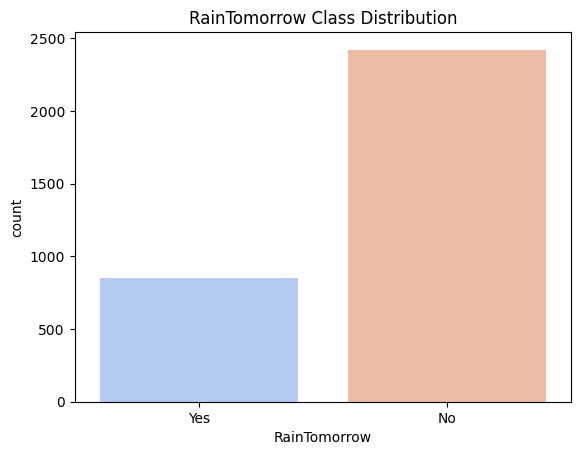

RainTomorrow
No     0.740446
Yes    0.259554
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x=df["RainTomorrow"], palette="coolwarm")
plt.title("RainTomorrow Class Distribution")
plt.show()


print(df["RainTomorrow"].value_counts(normalize=True))

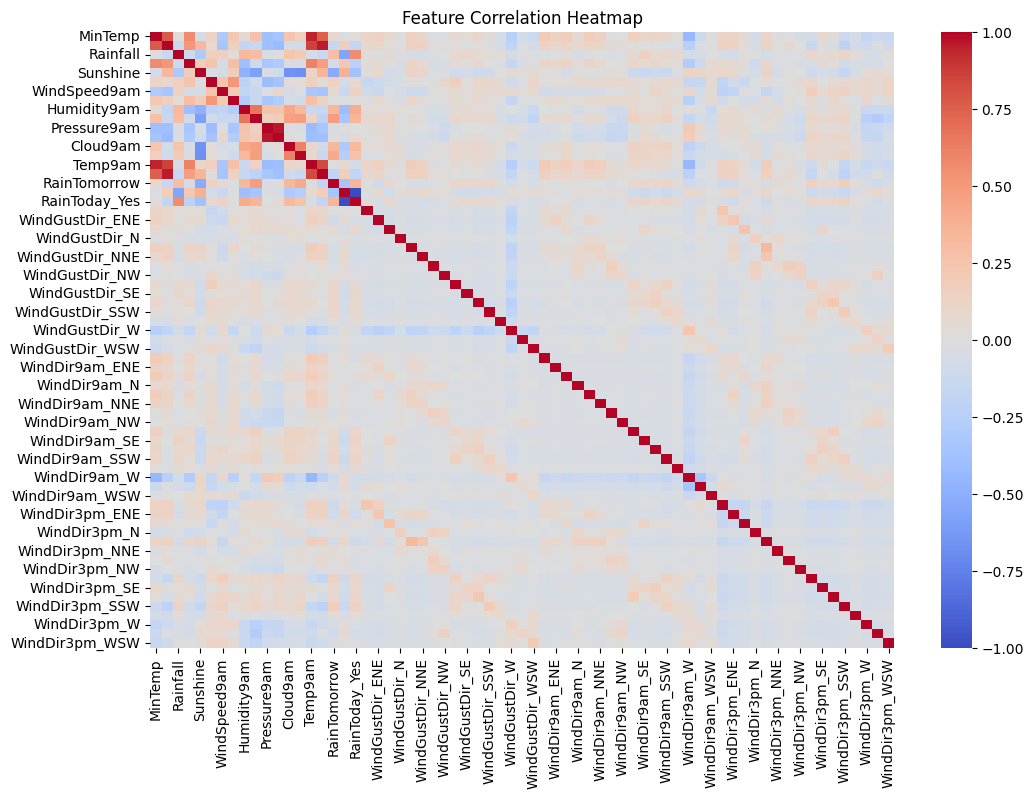

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,...,-0.006096,-0.057882,-0.075180,0.071836,0.025171,-0.131773,-0.074196,-0.165429,-0.129172,-0.135055
MaxTemp,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,...,0.058478,-0.001910,-0.151647,0.008442,-0.050886,-0.213966,-0.087241,-0.114668,-0.017097,-0.108176
Rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,...,-0.020313,-0.017927,0.096411,0.044433,0.053711,0.112996,0.036072,-0.034273,-0.049959,0.020607
Evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,...,-0.016018,-0.047131,-0.051291,0.069001,0.031471,-0.101030,-0.051831,-0.062852,-0.072257,-0.007111
Sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,...,-0.013700,-0.004798,-0.115154,-0.065347,-0.091772,-0.168845,-0.059655,0.033344,0.066551,0.041486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.131773,-0.213966,0.112996,-0.101030,-0.168845,0.096481,0.137927,0.033670,0.082297,0.131597,...,-0.023685,-0.029608,-0.062162,-0.057801,-0.066055,1.000000,-0.024613,-0.055899,-0.053182,-0.040944
WindDir3pm_SW,-0.074196,-0.087241,0.036072,-0.051831,-0.059655,0.067767,0.077584,-0.031000,0.001275,-0.019017,...,-0.012215,-0.015270,-0.032058,-0.029809,-0.034066,-0.024613,1.000000,-0.028828,-0.027427,-0.021116
WindDir3pm_W,-0.165429,-0.114668,-0.034273,-0.062852,0.033344,0.100644,0.096074,0.096827,-0.134868,-0.235915,...,-0.027741,-0.034679,-0.072808,-0.067700,-0.077368,-0.055899,-0.028828,1.000000,-0.062290,-0.047956
WindDir3pm_WNW,-0.129172,-0.017097,-0.049959,-0.072257,0.066551,0.063259,0.055324,-0.031216,-0.139134,-0.277288,...,-0.026392,-0.032993,-0.069268,-0.064409,-0.073607,-0.053182,-0.027427,-0.062290,1.000000,-0.045625


In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_sydney_processed.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
df_sydney_processed.corr()

In [ ]:

corr_matrix = df_sydney_processed.corr()
corr_matrix[['RainTomorrow']]

,RainTomorrow
MinTemp,0.082804
MaxTemp,-0.152525
Rainfall,0.296120
Evaporation,-0.070145
Sunshine,-0.529112
...,...
WindDir3pm_SSW,0.171661
WindDir3pm_SW,0.046124
WindDir3pm_W,-0.046956
WindDir3pm_WNW,-0.095579


In [11]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [12]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [13]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [14]:
df_sydney_processed = df_sydney_processed.astype(float)

In [15]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


In [ ]:

X = features
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", Y_train.shape)
print("Testing Labels Shape:", Y_test.shape)


Training Features Shape: (2616, 66)
Testing Features Shape: (655, 66)
Training Labels Shape: (2616,)
Testing Labels Shape: (655,)


In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:

LinearReg = LinearRegression()


LinearReg.fit(X_train, Y_train)


print("Intercept:", LinearReg.intercept_)
print("Coefficients:", LinearReg.coef_)


Intercept: 1139274582.2150812
Coefficients: [-2.36883601e-02  1.30031554e-02  7.30154915e-04  6.49290860e-03
 -3.51614515e-02  4.23841910e-03  1.82843563e-03  7.89794445e-04
  9.55888360e-04  8.56007751e-03  7.70261345e-03 -9.24932344e-03
 -8.87528023e-03  1.00457553e-02  1.44651992e-02 -3.48325241e-03
  1.03190076e+10  1.03190076e+10 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+

In [ ]:
predictions = LinearReg.predict(X_test)
print(predictions[:10])  

[0.13185596 0.27621174 0.97815037 0.28743076 0.13245678 0.46042728
 0.35680485 0.85641003 0.67499065 0.03827   ]


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
LinearRegression_MAE = mean_absolute_error(Y_test, predictions)
LinearRegression_MSE = mean_squared_error(Y_test, predictions)
LinearRegression_R2 = r2_score(Y_test, predictions)


print("Mean Absolute Error (MAE):", LinearRegression_MAE)
print("Mean Squared Error (MSE):", LinearRegression_MSE)
print("R2 Score (R²):", LinearRegression_R2)

Mean Absolute Error (MAE): 0.256318933909176
Mean Squared Error (MSE): 0.1157209828234031
R2 Score (R²): 0.4271301272061002


In [ ]:

import pandas as pd

In [ ]:

metrics_dict = {
    "Model": ["Linear Regression"],
    "MAE": [LinearRegression_MAE],
    "MSE": [LinearRegression_MSE],
    "R² Score": [LinearRegression_R2]
}


metrics_df = pd.DataFrame(metrics_dict)


print(metrics_df)

               Model       MAE       MSE  R² Score
0  Linear Regression  0.256319  0.115721   0.42713


### KNN


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:

KNN = KNeighborsClassifier(n_neighbors=4)


KNN.fit(X_train, Y_train)


print("KNN Model Parameters:", KNN.get_params())

KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}


In [ ]:
predictions = KNN.predict(X_test)
print(predictions[:10])  

[0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]


In [ ]:

from sklearn.metrics import accuracy_score, jaccard_score, f1_score

In [ ]:

KNN_Accuracy_Score = accuracy_score(Y_test, predictions)


KNN_JaccardIndex = jaccard_score(Y_test, predictions)


KNN_F1_Score = f1_score(Y_test, predictions)

KNN_Precision = precision_score(Y_test, predictions)
KNN_Recall = recall_score(Y_test, predictions)


print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN Jaccard Index:", KNN_JaccardIndex)
print("KNN F1 Score:", KNN_F1_Score)

KNN Accuracy Score: 0.8381679389312977
KNN Jaccard Index: 0.511520737327189
KNN F1 Score: 0.676829268292683


### Decision Tree


In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:

Tree = DecisionTreeClassifier()


Tree.fit(X_train, Y_train)


print("Decision Tree Model Parameters:", Tree.get_params())

Decision Tree Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
predictions = Tree.predict(X_test)
print(predictions[:10])  

[0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]


In [ ]:

from sklearn.metrics import accuracy_score, jaccard_score, f1_score


Tree_Accuracy_Score = accuracy_score(Y_test, predictions)


Tree_JaccardIndex = jaccard_score(Y_test, predictions)


Tree_F1_Score = f1_score(Y_test, predictions)

Tree_Precision = precision_score(Y_test, predictions)
Tree_Recall = recall_score(Y_test, predictions)


print("Decision Tree Accuracy Score:", Tree_Accuracy_Score)
print("Decision Tree Jaccard Index:", Tree_JaccardIndex)
print("Decision Tree F1 Score:", Tree_F1_Score)

Decision Tree Accuracy Score: 0.8381679389312977
Decision Tree Jaccard Index: 0.511520737327189
Decision Tree F1 Score: 0.676829268292683


### Logistic Regression


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", Y_train.shape)
print("Testing Labels Shape:", Y_test.shape)

Training Features Shape: (2616, 66)
Testing Features Shape: (655, 66)
Training Labels Shape: (2616,)
Testing Labels Shape: (655,)


In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:

LR = LogisticRegression(solver='liblinear')


LR.fit(X_train, Y_train)


print("Logistic Regression Model Parameters:", LR.get_params())

Logistic Regression Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:

predictions = LR.predict(X_test)


predict_proba = LR.predict_proba(X_test)


print("Predictions (First 10):", predictions[:10])


print("Predicted Probabilities (First 10):", predict_proba[:10])

Predictions (First 10): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Probabilities (First 10): [[0.73237141 0.26762859]
 [0.97552763 0.02447237]
 [0.53317815 0.46682185]
 [0.85161636 0.14838364]
 [0.96854679 0.03145321]
 [0.06350293 0.93649707]
 [0.68475321 0.31524679]
 [0.96087255 0.03912745]
 [0.91983721 0.08016279]
 [0.9350353  0.0649647 ]]


In [ ]:

from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

In [ ]:

LR_Accuracy_Score = accuracy_score(Y_test, predictions)


LR_JaccardIndex = jaccard_score(Y_test, predictions)


LR_F1_Score = f1_score(Y_test, predictions)


LR_Log_Loss = log_loss(Y_test, predict_proba)

LR_Precision = precision_score(Y_test, predictions)
LR_Recall = recall_score(Y_test, predictions)

# Display the results
print("Logistic Regression Accuracy Score:", LR_Accuracy_Score)
print("Logistic Regression Jaccard Index:", LR_JaccardIndex)
print("Logistic Regression F1 Score:", LR_F1_Score)
print("Logistic Regression Log Loss:", LR_Log_Loss)

Logistic Regression Accuracy Score: 0.8381679389312977
Logistic Regression Jaccard Index: 0.511520737327189
Logistic Regression F1 Score: 0.676829268292683
Logistic Regression Log Loss: 0.38103765010675233


### SVM


In [ ]:

from sklearn.svm import SVC

In [ ]:

SVM = SVC()


SVM.fit(X_train, Y_train)


print("SVM Model Parameters:", SVM.get_params())

SVM Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:

predictions = SVM.predict(X_test)

print(predictions[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score


SVM_Accuracy_Score = accuracy_score(Y_test, predictions)


SVM_JaccardIndex = jaccard_score(Y_test, predictions)


SVM_F1_Score = f1_score(Y_test, predictions)

SVM_Precision = precision_score(Y_test, predictions)
SVM_Recall = recall_score(Y_test, predictions)


print("SVM Accuracy Score:", SVM_Accuracy_Score)
print("SVM Jaccard Index:", SVM_JaccardIndex)
print("SVM F1 Score:", SVM_F1_Score)

SVM Accuracy Score: 0.8381679389312977
SVM Jaccard Index: 0.511520737327189
SVM F1 Score: 0.676829268292683


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=1, class_weight='balanced')   # Try adjusting C and gamma
SVM.fit(X_train, Y_train)

predictions = SVM.predict(X_test)
print(predictions[:10])

[0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]


In [ ]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score


SVM_Accuracy_Score = accuracy_score(Y_test, predictions)


SVM_JaccardIndex = jaccard_score(Y_test, predictions)


SVM_F1_Score = f1_score(Y_test, predictions)


print("SVM Accuracy Score:", SVM_Accuracy_Score)
print("SVM Jaccard Index:", SVM_JaccardIndex)
print("SVM F1 Score:", SVM_F1_Score)

SVM Accuracy Score: 0.8381679389312977
SVM Jaccard Index: 0.511520737327189
SVM F1 Score: 0.676829268292683


In [65]:
import pandas as pd

In [ ]:

metrics = {
    'Model': ['KNN', 'Decision Tree', 'Logistic Regression', 'SVM'],
    'Accuracy': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Index': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    'F1 Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    'Log Loss': [None, None, LR_Log_Loss, None]  
}


metrics_df = pd.DataFrame(metrics)


print(metrics_df)

                 Model  Accuracy  Jaccard Index  F1 Score  Log Loss
0                  KNN  0.792366       0.349282  0.517730       NaN
1        Decision Tree  0.764885       0.414449  0.586022       NaN
2  Logistic Regression  0.838168       0.511521  0.676829  0.381038
3                  SVM  0.838168       0.511521  0.676829       NaN


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


RF = RandomForestClassifier(n_estimators=100, random_state=42)


RF.fit(X_train, Y_train)


feature_importance = RF.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)

            Feature  Importance
9       Humidity3pm    0.152014
4          Sunshine    0.112769
8       Humidity9am    0.056073
13         Cloud3pm    0.055651
15          Temp3pm    0.044788
..              ...         ...
22   WindGustDir_NE    0.001227
56   WindDir3pm_NNW    0.001184
24  WindGustDir_NNW    0.000998
62    WindDir3pm_SW    0.000846
21    WindGustDir_N    0.000736

[66 rows x 2 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 11):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(Y_test, predictions)
    print(f'k={k}, Accuracy={acc:.4f}')


k=1, Accuracy=0.7710
k=2, Accuracy=0.8015
k=3, Accuracy=0.8229
k=4, Accuracy=0.8183
k=5, Accuracy=0.8198
k=6, Accuracy=0.8351
k=7, Accuracy=0.8336
k=8, Accuracy=0.8290
k=9, Accuracy=0.8351
k=10, Accuracy=0.8244


In [ ]:
metrics_df = pd.DataFrame({
    "Model": ["KNN", "Decision Tree", "Logistic Regression", "SVM"],
    "Precision": [KNN_Precision, Tree_Precision, LR_Precision, SVM_Precision],
    "Recall": [KNN_Recall, Tree_Recall, LR_Recall, SVM_Recall]
})


print(metrics_df)

                 Model  Precision   Recall
0                  KNN   0.760274  0.60989
1        Decision Tree   0.760274  0.60989
2  Logistic Regression   0.760274  0.60989
3                  SVM   0.760274  0.60989


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |
--!>